# 모두를 위한 딥러닝 : Pytorch
## Lecture 3 - Deep Look at Gradient Descent
본 문서는 모두를 위한 딥러닝 강의를 듣고 공부 목적으로 작성되었습니다.

### Theoritical Overview
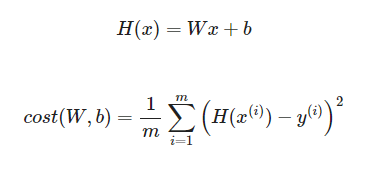
* bias가 없다고 가정하였다.


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [2]:
torch.manual_seed(1)

## Data

In [3]:
x_train = torch.FloatTensor([[1], [2], [3]])
y_train = torch.FloatTensor([[1], [2], [3]])

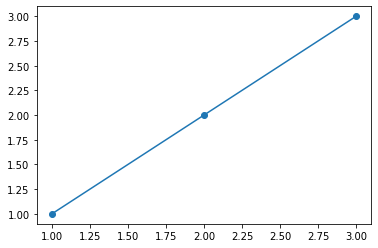

In [4]:
# Data
plt.scatter(x_train, y_train)
# Best-fit line
xs = np.linspace(1, 3, 1000)
plt.plot(xs, xs)

### Cost by W

In [6]:
W_l = np.linspace(-5, 7, 1000)
cost_l = []
for W in W_l:
    hypothesis = W * x_train
    cost = torch.mean((hypothesis - y_train)**2)
    
    cost_l.append(cost.item())

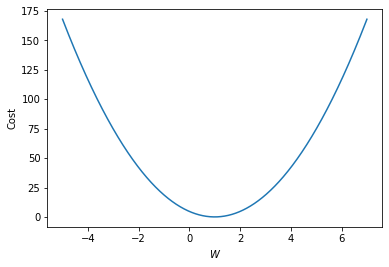

In [7]:
plt.plot(W_l, cost_l)
plt.xlabel('$W$')
plt.ylabel('Cost')
plt.show()

## Gradient Descent by Hand
직접 경사 하강법을 실행해보겠다.  
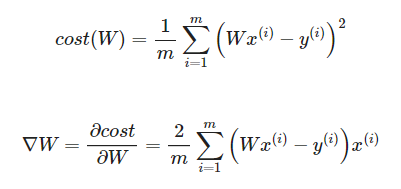  
위의 gradient 결과를 이용한다.

In [8]:
W = 0
gradient = torch.mean(2*(W*x_train - y_train)*x_train)

In [9]:
print(gradient)

tensor(-9.3333)


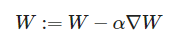

In [10]:
lr = 0.1
W -= lr * gradient
print(W)

tensor(0.9333)


### Training

In [15]:
#데이터
x_train = torch.FloatTensor([[1], [2], [3]])
y_train = torch.FloatTensor([[1], [2], [3]])

W = torch.zeros(1)

lr = 0.15

for epoch in range(1,11):
    hypothesis = x_train*W
    
    cost = torch.mean((hypothesis - y_train)**2)
    gradient = torch.mean(2*(hypothesis - y_train)*x_train)
    
    print('Epoch {:4d}/{} W: {:.3f}, Cost: {:.6f}'.format(
        epoch, 10, W.item(), cost.item()
    ))

    
    W-= lr*gradient

Epoch    1/10 W: 0.000, Cost: 4.666667
Epoch    2/10 W: 1.400, Cost: 0.746666
Epoch    3/10 W: 0.840, Cost: 0.119467
Epoch    4/10 W: 1.064, Cost: 0.019115
Epoch    5/10 W: 0.974, Cost: 0.003058
Epoch    6/10 W: 1.010, Cost: 0.000489
Epoch    7/10 W: 0.996, Cost: 0.000078
Epoch    8/10 W: 1.002, Cost: 0.000013
Epoch    9/10 W: 0.999, Cost: 0.000002
Epoch   10/10 W: 1.000, Cost: 0.000000


### Training with optim

In [14]:
# 데이터
x_train = torch.FloatTensor([[1], [2], [3]])
y_train = torch.FloatTensor([[1], [2], [3]])
# 모델 초기화
W = torch.zeros(1, requires_grad=True)
# optimizer 설정
optimizer = optim.SGD([W], lr=0.15)

nb_epochs = 10
for epoch in range(nb_epochs + 1):
    
    # H(x) 계산
    hypothesis = x_train * W
    
    # cost 계산
    cost = torch.mean((hypothesis - y_train) ** 2)

    print('Epoch {:4d}/{} W: {:.3f} Cost: {:.6f}'.format(
        epoch, nb_epochs, W.item(), cost.item()
    ))

    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

Epoch    0/10 W: 0.000 Cost: 4.666667
Epoch    1/10 W: 1.400 Cost: 0.746667
Epoch    2/10 W: 0.840 Cost: 0.119467
Epoch    3/10 W: 1.064 Cost: 0.019115
Epoch    4/10 W: 0.974 Cost: 0.003058
Epoch    5/10 W: 1.010 Cost: 0.000489
Epoch    6/10 W: 0.996 Cost: 0.000078
Epoch    7/10 W: 1.002 Cost: 0.000013
Epoch    8/10 W: 0.999 Cost: 0.000002
Epoch    9/10 W: 1.000 Cost: 0.000000
Epoch   10/10 W: 1.000 Cost: 0.000000
